In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
%matplotlib inline

In [21]:
#reading data
df = pd.read_csv('FuelConsumptionCo2.csv')

In [22]:
#looking at last 5 values
df.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


In [23]:
#summary of data frame
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [41]:
#taking only some features in cdf
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_HWY', 'CO2EMISSIONS']]

In [42]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_HWY,CO2EMISSIONS
0,2.0,4,9.9,8.5,6.7,196
1,2.4,4,11.2,9.6,7.7,221
2,1.5,4,6.0,5.9,5.8,136
3,3.5,6,12.7,11.1,9.1,255
4,3.5,6,12.1,10.6,8.7,244


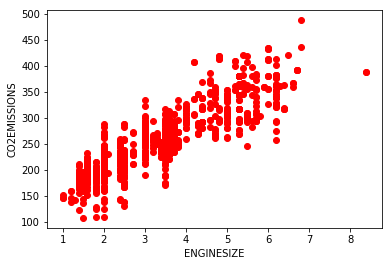

In [43]:
#plotting enginesize with respect to co2emissions
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color= 'red')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [44]:
mask = np.random.rand(len(df)) < 0.8
train = cdf[mask]
test = cdf[~mask]

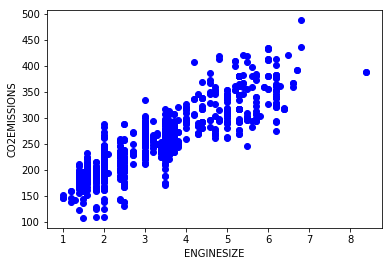

In [45]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [46]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(train['CO2EMISSIONS'])
regr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
print("coefficients: ", regr.coef_)
print("Intercepts: ", regr.intercept_)

coefficients:  [10.19337149  7.44596392  9.98973669]
Intercepts:  63.35932639226269


In [48]:
x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
pred_y = regr.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])


In [60]:
from sklearn.metrics import r2_score
print("r2 score: %.2f" %r2_score(pred_y, y))
print("residual sum of squares: %.2f" %np.mean(pred_y - y)**2)
print("variance score: %.2f" % regr.score(x,y))
print("mean absolute error: %.2f" %np.mean(np.absolute(pred_y-y)))

r2 score: 0.80
residual sum of squares: 0.20
variance score: 0.83
mean absolute error: 17.83


In [54]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
print("coefficients: ", regr.coef_)
print("intercepts: ", regr.intercept_)

coefficients:  [[10.25632911  7.03777973  6.56494051  3.07869155]]
intercepts:  [64.74881316]


In [57]:
x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
pred_y = regr.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])


In [59]:
from sklearn.metrics import r2_score
print("r2 score: %.2f" %r2_score(pred_y, y))
print("residual sum of errors: %.2f" %np.mean(pred_y - y)**2)
print("variance: %.2f" % regr.score(x,y))
print("mean absolute error: %.2f" %np.mean(np.absolute(pred_y - y)))

r2 score: 0.80
residual sum of errors: 0.20
variance: 0.83
mean absolute error: 17.83
